### 为什么要标准化数据
##### 为了消除指标之间的量纲影响，需要进行数据标准化处理，以解决数据指标之间的可比性。原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。其中，最典型的就是数据的归一化处理。 
#### 简而言之，归一化的目的就是使得预处理的数据被限定在一定的范围内（比如[0,1],也有说[-1,1]之间也叫归一化），从而消除奇异样本数据导致的不良影响。
##### 奇异样本数据是指相对于其他输入样本特别大或特别小的样本矢量（即特征向量）
#### 奇异样本数据的存在会引起训练时间增大，同时也可能导致无法收敛，因此，当存在奇异样本数据时，在进行训练之前需要对预处理数据进行归一化；反之，不存在奇异样本数据时，则可以不进行归一化。
## 
## 归一化的对比
##### --如果不进行归一化，那么由于特征向量中不同特征的取值相差较大，会导致目标函数变“扁”。这样在进行梯度下降的时候，梯度的方向就会偏离最小值的方向，走很多弯路，即训练时间过长。
![jupyter](./image/未归一化的目标函数.jpg)
##### -如果进行归一化以后，目标函数会呈现比较“圆”，这样训练速度大大加快，少走很多弯路。
![jupyter](./image/归一化的目标函数.jpg)

## 标准化和归一化的区别:
##### 归一化是标准化的一种方式,
##### 归一化是将样本的特征值转换到同一量纲下把数据映射到[0,1]或者[-1, 1]区间内，仅由变量的极值决定，因区间放缩法是归一化的一种。
##### 标准化是将数据按照比例缩放,使之放到一个特定区间中,
##### 而标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，转换为标准正态分布，和整体样本分布相关，每个样本点都能对标准化产生影响。标准化后的数据均值为0,标准差等于1,因而标准化的数据可正可负.
##### 从输出范围角度来看， 归一化的输出结果必须在 0-1 间。而标准化的输出范围不受限制。通常情况下在机器学习中，标准化是更常用的手段，归一化的应用场景是有限的。标准化更好保持了样本间距，且更符合统计学假设。

## 归一化和标准化的相同点：
##### 它们的相同点在于都能取消由于量纲不同引起的误差；都是一种线性变换，都是对向量X按照比例压缩再进行平移。

## 
## 什么时候用归一化？
##### (1)如果对输出结果范围有要求，用归一化。
##### (2)如果数据较为稳定，不存在极端的最大最小值，用归一化。
##### (3)如果数据存在异常值和较多噪音，用标准化，可以间接通过中心化避免异常值和极端值的影响。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### 数据准备

In [2]:
X_data = data['data']
Y_data = data['target']

#### 表格数据转换查看

In [3]:
targets = np.array([data['target_names'][target_No] for target_No in Y_data])
targets = targets.reshape(len(targets),1)
rows = np.c_[X_data,targets]
column_names = data['feature_names']+['target_names']
table = pd.DataFrame(data=rows,columns=column_names)
table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Min-Max Normalization 归一化 
![jupyter](./image/最大最小标准化.png)
##### 线性函数将原始数据线性化的方法转换到[0 1]的范围, 计算结果为归一化后的数据，X为原始数据
##### 本归一化方法比较适用在数值比较集中的情况；
##### 缺陷：如果max和min不稳定，很容易使得归一化结果不稳定，使得后续使用效果也不稳定。实际使用中可以用经验常量来替代max和min。
##### 应用场景：在不涉及距离度量、协方差计算、数据不符合正太分布的时候，可以使用第一种方法或其他归一化方法（不包括Z-score方法）。比如图像处理中，将RGB图像转换为灰度图像后将其值限定在[0 255]的范围

In [75]:
def MinMaxNormalization(X):
    maximum_X = np.max(X,axis=0) 
    minimum_X = np.min(X,axis=0)
    
    return (X - minimum_X)/(maximum_X-minimum_X)

MinMaxNormalization(X_data)[0]

array([0.22222222, 0.625     , 0.06779661, 0.04166667])

#### 调用 scikit-learn MinMaxScaler类可以看到计算结果与上面相同

In [76]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_minmax = min_max_scaler.fit_transform(X_data)
x_minmax[0]

array([0.22222222, 0.625     , 0.06779661, 0.04166667])

## MaxAbsScaler 归一化
#### $ MaxAbsScaler(X) = \frac{X}{Max(X)} $


In [7]:

def MaxABSScaler(X):
    maximum_X = np.max(X,axis=0)
    return X/maximum_X

MaxABSScaler(X_data)[0]

array([0.64556962, 0.79545455, 0.20289855, 0.08      ])

#### 调用 scikit-learn MaxAbsScaler 类计算可以看到结果与上面相同

In [68]:
from sklearn.preprocessing import MaxAbsScaler

max_abs_scaler = MaxAbsScaler()
max_abs_scaler.fit_transform(X_data)[0]

array([0.64556962, 0.79545455, 0.20289855, 0.08      ])

## L2 范数归一化
#### scaling to unit length
![jupyter](./image/L2范数归一化.jpg)
#### $ X^{'}_{i} = \frac{X_{i}}{norm(X)} $

In [77]:
def L2NormScaler(X):
    norm_X = np.sqrt((X**2).sum(axis=0))
    ## 等价于下面的计算
#     norm_X = np.linalg.norm(X,axis=0)    
    return X / norm_X

L2NormScaler(X_data).shape

(150, 4)

## 神经网络归一化
##### 本归一化方法经常用在数据分化比较大的场景，有些数值很大，有些很小。通过一些数学函数，将原始值进行映射。
#### (1)log对数函数归一化
![jupyter](./image/log对数函数归一化.jpg)
#### $ X^{'} = \frac{log10(x)}{log10(max)} $

In [80]:
def Log10Scaler(X):
    y = np.log10(X)
    maximum_X = np.max(X,axis=0)
    return y/np.log10(maximum_X)

Log10Scaler(X_data).shape

(150, 4)

![jupyter](./image/反正切函数归一化.jpg)

#### $ X^{'} = atan(x)\frac{2}{pi} $

In [72]:
import math
def AtanScaler(X):
    return np.arctan(X)*(2/np.pi)

AtanScaler(X_data).shape

(150, 4)

## Mean normalization 归一化
#### $MeanNormalization(x) = \frac{x_i-mean(X)}{X_{max} - X_{min}}$

In [73]:
def Mean_normalization(X):
    mu = np.mean(X,axis=0)
    maxinum_X = np.max(X,axis=0)
    mininum_X = np.min(X,axis=0)
    return (X-mu) / (maxinum_X-mininum_X)

Mean_normalization(X_data).shape

(150, 4)

## 作图观察不同归一化方法的图像表现

/tmp/ipykernel_150978/3683713195.py:2: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(X)
/tmp/ipykernel_150978/3683713195.py:2: RuntimeWarning: invalid value encountered in log10
  y = np.log10(X)


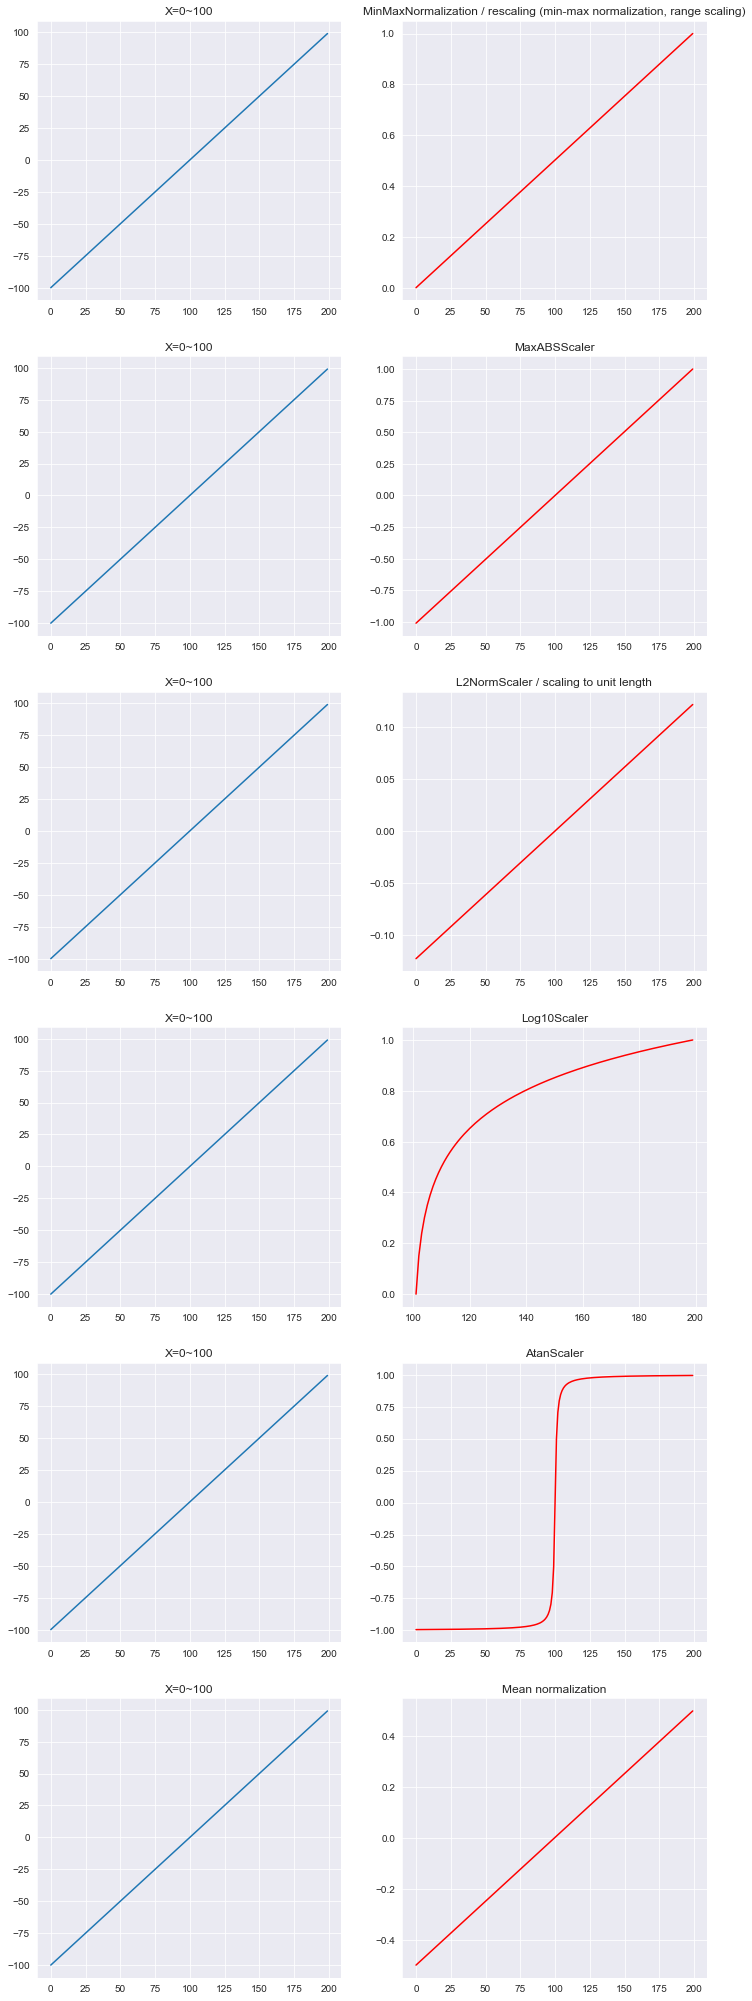

In [84]:
import seaborn as sns
sns.set_style("darkgrid")

x_range = np.arange(-100,100)

fig, ax = plt.subplots(6, 2,figsize=(12,36))
ax[0][0].set_title('X=0~100')
ax[0][0].plot(x_range)
ax[0][1].set_title('MinMaxNormalization / rescaling (min-max normalization, range scaling)')
ax[0][1].plot(MinMaxNormalization(x_range),c="r")

ax[1][0].set_title('X=0~100')
ax[1][0].plot(x_range)
ax[1][1].set_title('MaxABSScaler')
ax[1][1].plot(MaxABSScaler(x_range),c="r")

ax[2][0].set_title('X=0~100')
ax[2][0].plot(x_range)
ax[2][1].set_title('L2NormScaler / scaling to unit length')
ax[2][1].plot(L2NormScaler(x_range),c="r")

# ax[3][0].set_title('X=0~100')
# ax[3][0].plot(x_range)
# ax[3][1].set_title('Log10(x)')
# ax[3][1].plot(np.log10(x_range),c="r")

ax[3][0].set_title('X=0~100')
ax[3][0].plot(x_range)
ax[3][1].set_title('Log10Scaler')
ax[3][1].plot(Log10Scaler(x_range),c="r")

ax[4][0].set_title('X=0~100')
ax[4][0].plot(x_range)
ax[4][1].set_title('AtanScaler')
ax[4][1].plot(AtanScaler(x_range),c="r")

ax[5][0].set_title('X=0~100')
ax[5][0].plot(x_range)
ax[5][1].set_title('Mean normalization')
ax[5][1].plot(Mean_normalization(x_range),c="r")

## 标准化方法

####
![jupyter](./image/Z-score标准化.png)

### $z = \frac{x-\mu}{\sigma}$
#### $ \mu $ 是均值 $ \sigma $ 是标准差 
##### 将原始数据集归一化为均值为0、方差1的数据集
##### 该种归一化方式要求原始数据的分布可以近似为高斯分布，否则归一化的效果会变得很糟糕。
##### 应用场景：在分类、聚类算法中，需要使用距离来度量相似性的时候、或者使用PCA技术进行降维的时候，Z-score standardization表现更好。

In [47]:
def Zscore(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0) 
    return (X-mu)/sigma

Zscore(X_data)[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

#### Scikit-learn标准化
方法结果

In [48]:
sc = StandardScaler()
sc.fit(X_data)
sc.transform(X_data)[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [52]:
x_range = np.arange(-100,100).reshape(200,1)

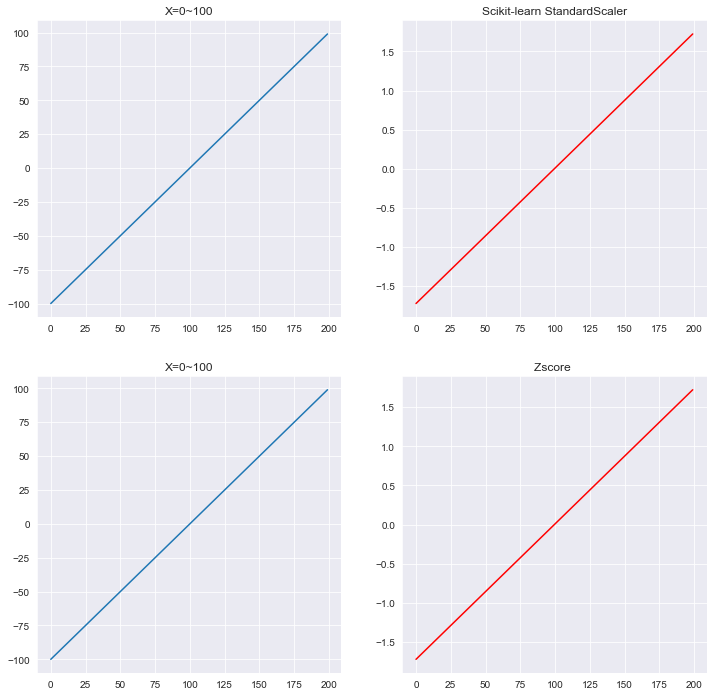

In [58]:
fig, ax = plt.subplots(2, 2,figsize=(12,12))
ax[0][0].set_title('X=0~100')
ax[0][0].plot(x_range)
ax[0][1].set_title('Scikit-learn StandardScaler')
sc.fit(x_range)
ax[0][1].plot(sc.transform(x_range),c="r")

ax[1][0].set_title('X=0~100')
ax[1][0].plot(x_range)
ax[1][1].set_title('Zscore ')
ax[1][1].plot(Zscore(x_range.ravel()),c="r")